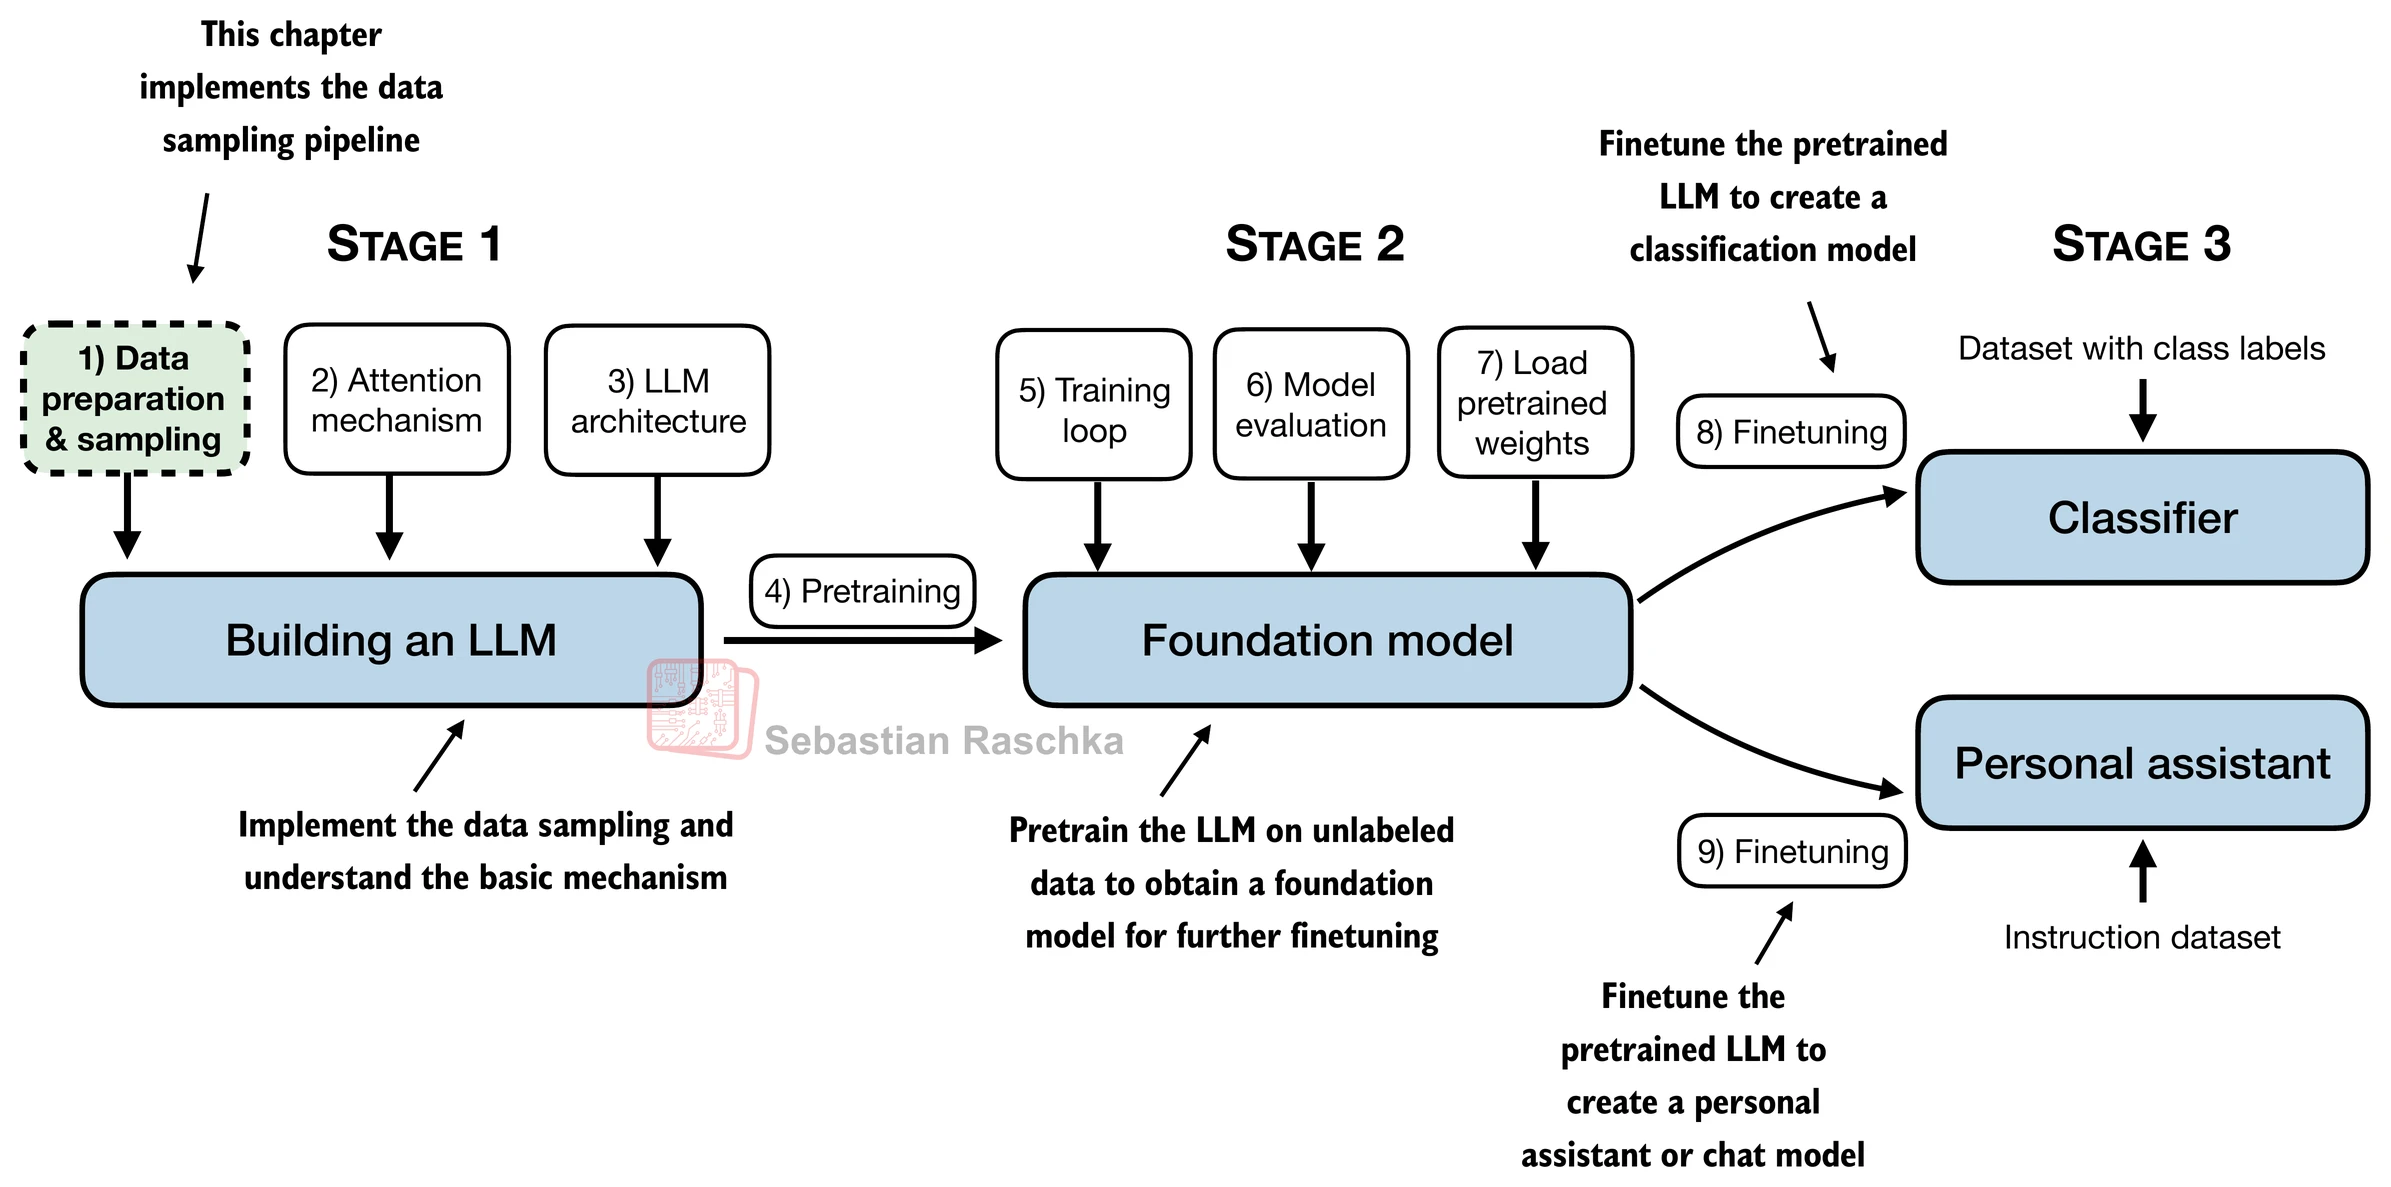

In [2]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()
print("Total number of character:", len(raw_text))
print(raw_text[:99])

Total number of character: 20481
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [3]:
import re
text = "Hello, world. This, is a test."
result = re.split(r'(\s)',text)
print(result)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


In [4]:
result = re.split(r'([,.]|\s)',text)
print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


In [5]:
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']


In [6]:
text = "Hello, world. Is this-- a test?"
result = re.split(r'([,.:;?_!"()\']|--|\s)',text)
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [7]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(len(preprocessed))
print(preprocessed[:30])

4690
['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


In [8]:
all_words = sorted(preprocessed)
vocab_size = len(all_words)
print(vocab_size)

4690


In [9]:
vocab = {token: integer for integer, token in enumerate(all_words)}
for i, item in enumerate(vocab.items()):
    print(item)
    if i >= 50:
        break

('!', 23)
('"', 160)
("'", 254)
('(', 257)
(')', 260)
(',', 489)
('--', 586)
('.', 798)
(':', 819)
(';', 841)
('?', 865)
('A', 867)
('Ah', 869)
('Among', 870)
('And', 879)
('Are', 880)
('Arrt', 881)
('As', 882)
('At', 883)
('Be', 885)
('Begin', 886)
('Burlington', 887)
('But', 897)
('By', 899)
('Carlo', 901)
('Chicago', 902)
('Claude', 903)
('Come', 904)
('Croft', 908)
('Destroyed', 909)
('Devonshire', 910)
('Don', 912)
('Dubarry', 914)
('Emperors', 915)
('Florence', 916)
('For', 919)
('Gallery', 920)
('Gideon', 921)
('Gisburn', 940)
('Gisburns', 941)
('Grafton', 942)
('Greek', 943)
('Grindle', 948)
('Grindles', 949)
('HAD', 950)
('Had', 951)
('Hang', 952)
('Has', 953)
('He', 968)
('Her', 969)
('Hermia', 971)


In [10]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s, i in vocab.items()}
    def encode(self, text):
        preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text)
        preprocessed = [
            item.strip() for item in preprocessed if item.strip()
        ]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [11]:
tokenizer = SimpleTokenizerV1(vocab)
text = """It's the last he painted, you know,
    Mrs.Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

[1117, 254, 3608, 4131, 2857, 2466, 3392, 489, 4684, 2843, 489, 1169, 798, 940, 3622, 4615, 3410, 3482, 798]


In [12]:
print(tokenizer.decode(ids))

It' s the last he painted, you know, Mrs. Gisburn said with pardonable pride.


In [13]:
t = "Hello, world!"
print(tokenizer.encode(t))

KeyError: 'Hello'

In [14]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>","<|unk|>"])
vocab = {token: integer for integer, token in enumerate(all_tokens)}

print(len(vocab.items()))

1132


In [15]:
for i , item in enumerate(list(vocab.items())[-5:]):
    print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


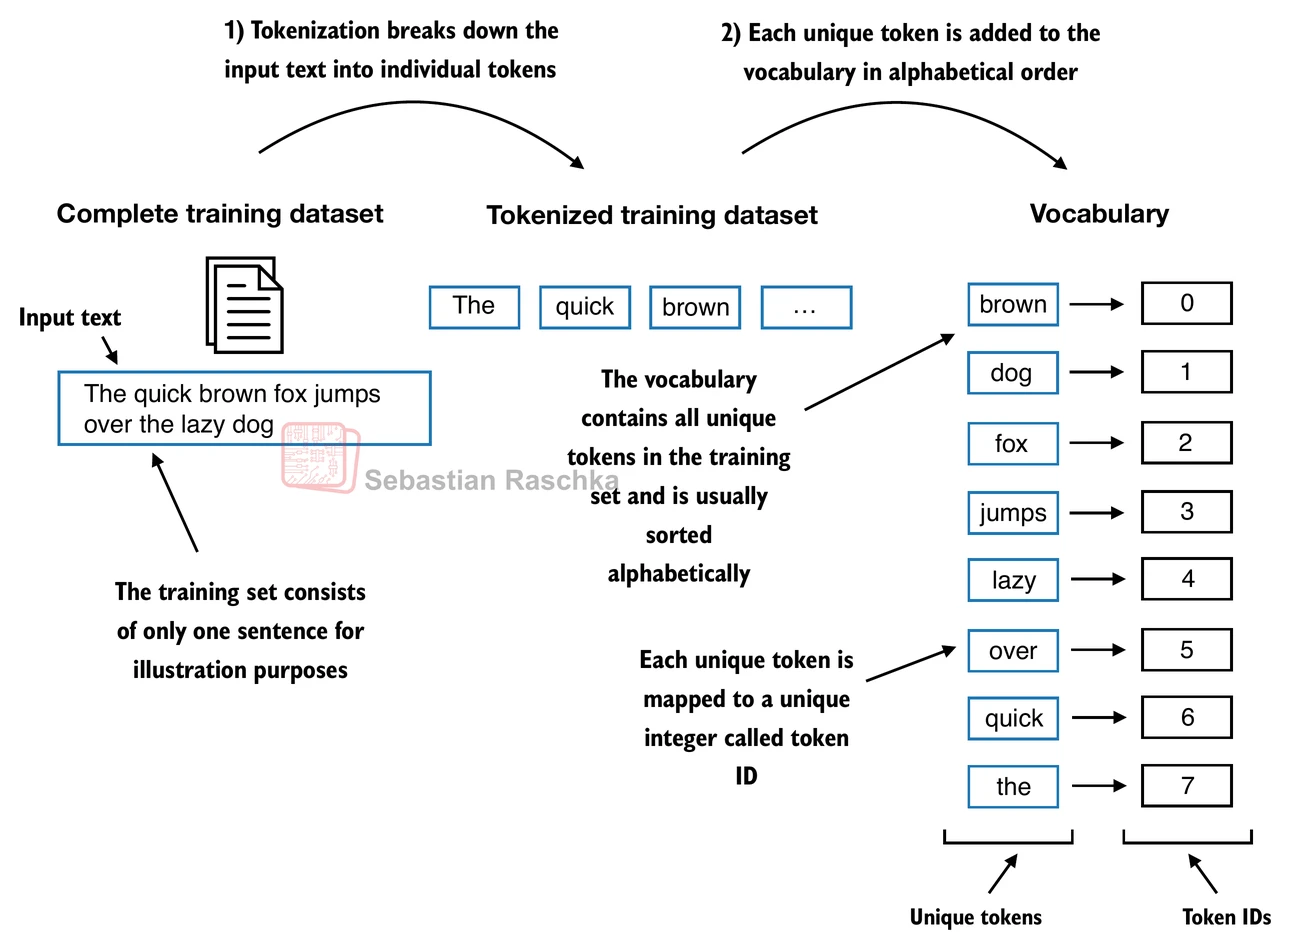

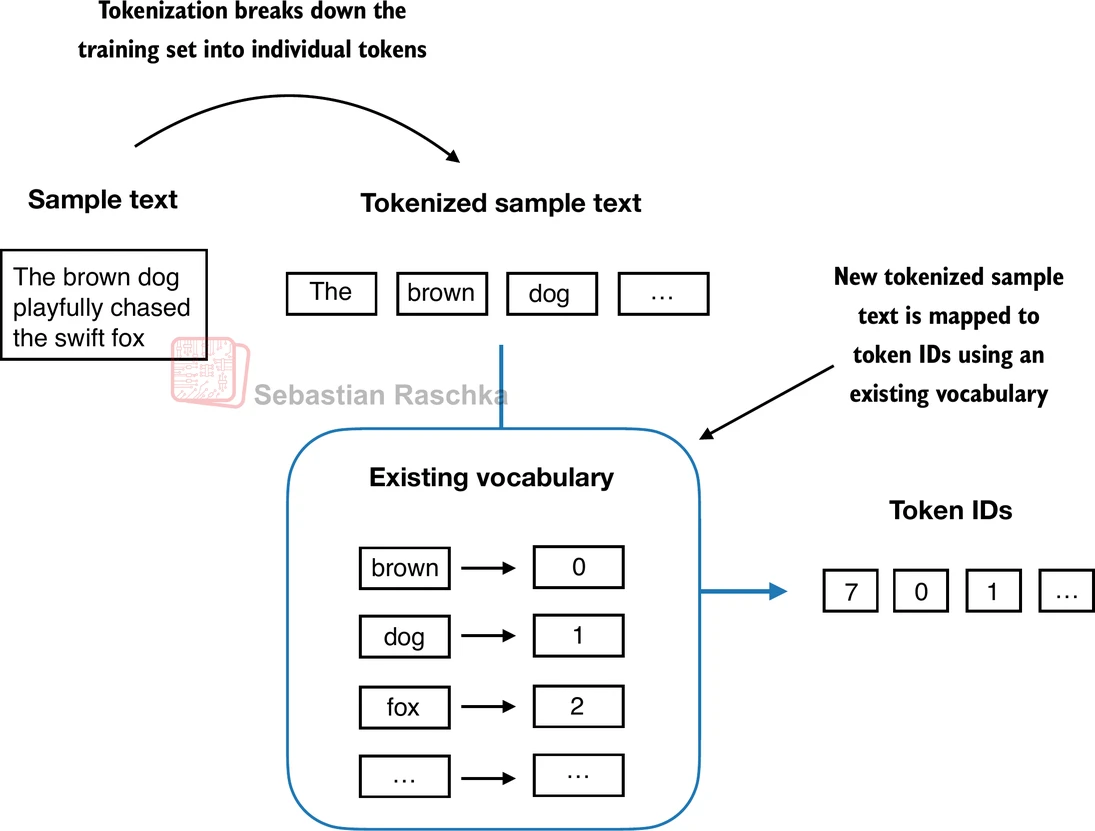

In [16]:
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s, i in vocab.items()}
    def encode(self, text):
        preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text)
        preprocessed = [
            item.strip() for item in preprocessed if item.strip()
        ]
        preprocessed = [item if item in self.str_to_int 
                        else "<|unk|>" for item in preprocessed]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [18]:
text1 = "Hello, do you lke tea?"
text2 = "In th sunlit terraces of the palace."
text = " <|endoftext|> ".join((text1,text2))
print(text)

Hello, do you lke tea? <|endoftext|> In th sunlit terraces of the palace.


In [19]:
tokenizer = SimpleTokenizerV2(vocab)
print(tokenizer.encode(text))

[1131, 5, 355, 1126, 1131, 975, 10, 1130, 55, 1131, 956, 984, 722, 988, 1131, 7]


In [20]:
print(tokenizer.decode(tokenizer.encode(text)))

<|unk|>, do you <|unk|> tea? <|endoftext|> In <|unk|> sunlit terraces of the <|unk|>.


### Byte pair encoding

In [21]:
!pip install tiktoken

  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 18.2 MB/s  0:00:00
Using cached requests-2.32.5-py3-none-any.whl (64 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [tiktoken]6/7 [tiktoken]


In [22]:
from importlib.metadata import version
import tiktoken
print("tiktoken version:", version("tiktoken"))

tiktoken version: 0.12.0


In [25]:
tokenizer = tiktoken.get_encoding("gpt2")
text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
    " of someunknownPlace."
)
integers = tokenizer.encode(text, allowed_special = {"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 286, 617, 34680, 27271, 13]


In [26]:
strings = tokenizer.decode(integers)
print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of someunknownPlace.


## sliding window

In [27]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5147


In [28]:
enc_sample = enc_text[50:]

In [29]:
context_size = 4
x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]
print(f"x: {x}")
print(f"y:       {y}")

x: [290, 4920, 2241, 287]
y:       [4920, 2241, 287, 257]


In [30]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print(context,"------>", desired)

[290] ------> 4920
[290, 4920] ------> 2241
[290, 4920, 2241] ------> 287
[290, 4920, 2241, 287] ------> 257


In [31]:
for i in range(1, context_size+1):
    context= enc_sample[:i]
    desired = enc_sample[i]
    print(tokenizer.decode(context),"------->", tokenizer.decode([desired]))


 and ------->  established
 and established ------->  himself
 and established himself ------->  in
 and established himself in ------->  a


In [ ]:
import torch
from torch.utils.data import  Dataset, DataLoader

class GPTDatabseV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        token_ids = tokenizer.encode(txt)
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i: i+ max_length]
            target_chunk = token_ids[i+1 : i+ max_length+1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)
    
    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]
    '''def __getitem__(self, idx):
        start = idx * self.stride
        end = start + self.max_length + 1
        chunk = self.ids[start:end]
        x = torch.tensor(chunk[:-1], dtype=torch.long)
        y = torch.tensor(chunk[1:], dtype=torch.long)
        return x, y'''
    

In [1]:
def create_dataloader_v1(txt, batch_size =4, max_length =256, stride =128, shuffle = True,drop_last = True, num_workers = 0):
    tokenizer = tiktoken.get_encoding("gpt2")
    dataset =GPTDatabseV1(txt, tokenizer, max_length, stride)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last, num_workers=num_workers)
    return dataloader 


In [35]:
with open("the-verdict.txt", "r", encoding = "utf-8") as f:
    raw_text = f.read()
dataLoader = create_dataloader_v1(raw_text, batch_size= 1, max_length=4, stride =1, shuffle= False)
data_iter = iter(dataLoader)
first_batch = next(data_iter)
print(first_batch)

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [36]:
second_batch  = next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


In [38]:
# example (not modifying files)
tokens = list(range(10))      # tokens 0..9
max_length = 4
for stride in (1, 2, 4, 5):
    windows = [tokens[i:i+max_length] for i in range(0, len(tokens)-max_length, stride)]
    print("stride", stride, "->", windows)

stride 1 -> [[0, 1, 2, 3], [1, 2, 3, 4], [2, 3, 4, 5], [3, 4, 5, 6], [4, 5, 6, 7], [5, 6, 7, 8]]
stride 2 -> [[0, 1, 2, 3], [2, 3, 4, 5], [4, 5, 6, 7]]
stride 4 -> [[0, 1, 2, 3], [4, 5, 6, 7]]
stride 5 -> [[0, 1, 2, 3], [5, 6, 7, 8]]


In [ ]:
#ex1
dataLoader = create_dataloader_v1(raw_text, batch_size= 1, max_length=2, stride =2, shuffle= False)
data_iter = iter(dataLoader)
first_batch = next(data_iter)
print(first_batch)

[tensor([[ 40, 367]]), tensor([[ 367, 2885]])]


In [ ]:
#ex2
dataLoader = create_dataloader_v1(raw_text, batch_size= 1, max_length=8, stride =2, shuffle= False)
data_iter = iter(dataLoader)
first_batch = next(data_iter)
print(first_batch)

[tensor([[  40,  367, 2885, 1464, 1807, 3619,  402,  271]]), tensor([[  367,  2885,  1464,  1807,  3619,   402,   271, 10899]])]


In [43]:
dataLoader = create_dataloader_v1(raw_text, batch_size= 8, max_length=4, stride =4, shuffle= False)
data_iter = iter(dataLoader)
inps , outs = next(data_iter)
print("Inputs:\n", inps)
print("Outputs:\n" , outs)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])
Outputs:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


## creating token embeddings

In [46]:
vocab_size =6 
output_dim = 3
torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [47]:
print(embedding_layer(torch.tensor([3])))

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


In [48]:
inputs_ids = torch.tensor([2,3,5,1])
print(embedding_layer(inputs_ids))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


In [49]:
vocab_size = 50257
output_dim = 256
token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
max_length =4
dataloader = create_dataloader_v1(raw_text, batch_size=8, max_length=max_length,
                                  stride= max_length, shuffle= False)
data_iter = iter(dataloader)
inputs, outputs = next(data_iter)
print("Token IDs:\n", inputs)
print("\n Inputs shape: \n", inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

 Inputs shape: 
 torch.Size([8, 4])


In [51]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [52]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
pos_embeddings = pos_embedding_layer(torch.arange(context_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


In [54]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])


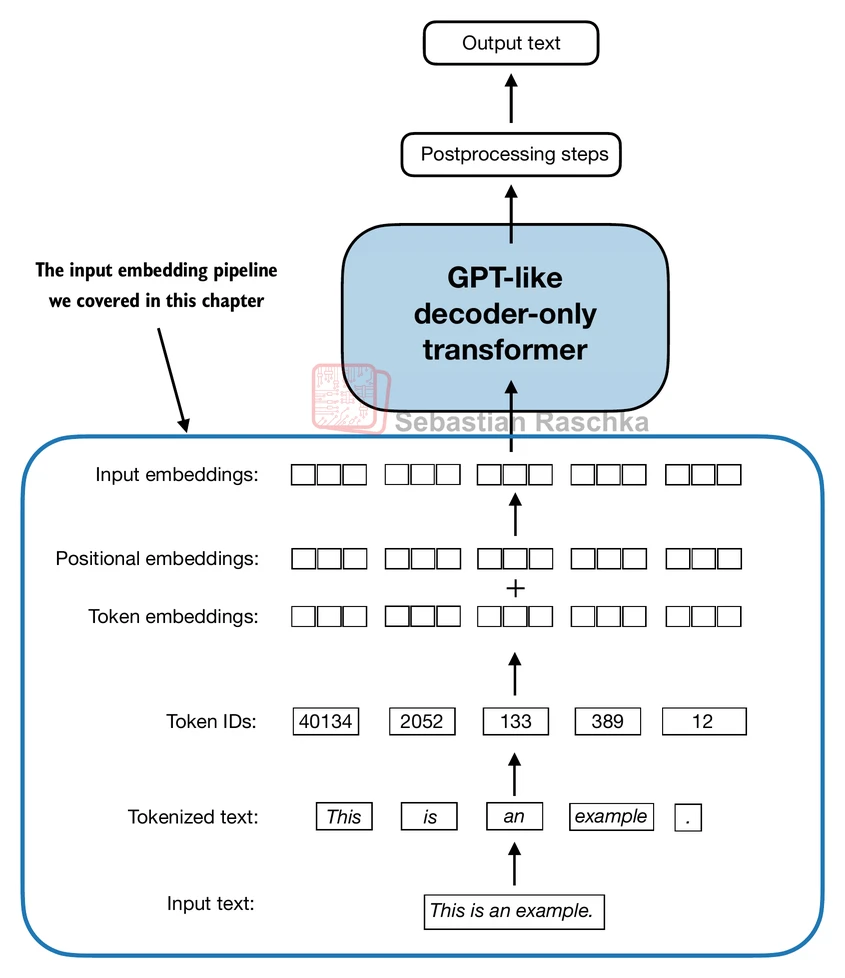